In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [4]:
type(mnist.data)


numpy.ndarray

In [5]:
import pandas as pd

In [6]:
mndf=pd.DataFrame(mnist.data)

In [7]:
mndf.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mndf.shape

(70000, 784)

In [9]:
mndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 52.3 MB


In [10]:
from matplotlib import pyplot as plt

In [11]:
ard=mnist.data
sample_data=ard[36000]

In [12]:
sm=sample_data.reshape(28,28)

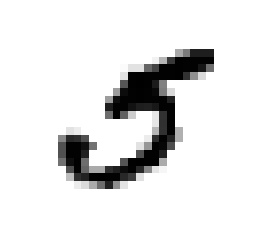

In [13]:
import matplotlib
plt.close()
plt.imshow(sm, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

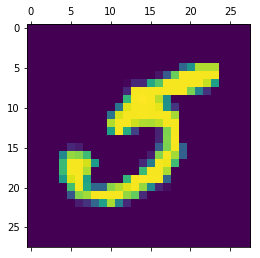

In [14]:
plt.matshow(sm)
plt.show()

In [15]:
X, y = mnist["data"], mnist["target"]

In [16]:

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

100


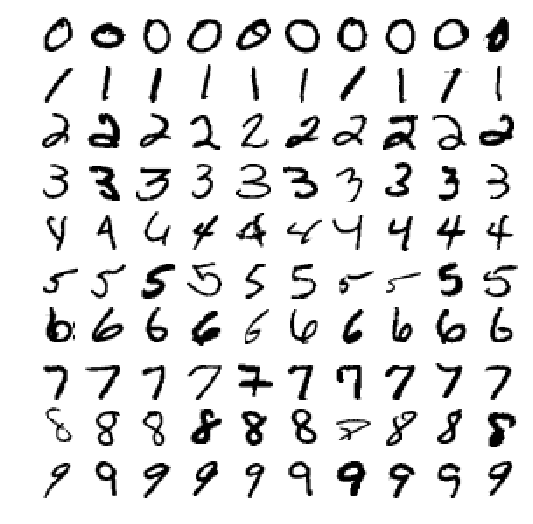

In [17]:
import numpy as np
plt.close()
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
print(len(example_images))
plot_digits(example_images, images_per_row=10)
plt.show()

In [18]:
X.shape

(70000, 784)

In [19]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [20]:
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [21]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)
print(X_train.shape,y_train_5.shape)

(60000, 784) (60000,)


# Binary classifier

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=44)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=44, shuffle=True, verbose=0,
       warm_start=False)

In [23]:
sgd_clf.predict([sample_data])

array([ True], dtype=bool)

# Performance Measures


In [24]:
#Cross validation custome function
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3,random_state=44)

splits = skfolds.split(X_train,y_train_5)
for train_index,test_index in splits :
    clone_clf = clone(sgd_clf)
    
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    
    print(n_correct/len(y_pred))
    
    


0.96585
0.91665
0.92265


In [25]:
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([ 0.96585,  0.91665,  0.92265])

In [26]:
#Dump Classifier always say NOT 5
from sklearn.base import BaseEstimator

class Never5Estimator(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [29]:
never5_clf=Never5Estimator()
cross_val_score(never5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([ 0.90865,  0.9092 ,  0.9111 ])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. Beats Nostradamus.

# Confusion Matrix
A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

In [35]:
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(never5_clf,X_train,y_train_5,cv=3)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_predict)

array([[54579,     0],
       [ 5421,     0]])

In [55]:
y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
confusion_matrix(y_train_5,y_train_predict)
cross_val_predict?

 Each row in a confusion matrix represents an actual class, while each column represents a predicted class.
 The first row of this matrix considers non-5 images (the negative class): 53,272 of them were correctly classified as non-5s (they are called true negatives), while the remaining 1,307 were wrongly classified as 5s (false positives).
 The second row considers the images of 5s (the positive class): 1,077 were wrongly classified as non-5s (false negatives), while the remaining 4,344 were correctly classified as 5s (true positives).
 A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):

In [40]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]])

# Precision and Recall

In [43]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_predict)

0.59491778774289983

In [45]:
recall_score(y_train_5,y_train_predict)

0.88101826231322633

In [46]:
precision_score(y_train_5,y_train_predict)

0.59491778774289983

# F1 = 2/(1/precison+1/recall)

In [47]:
2/(1/.59491778774289983 + 1/.88101826231322633)

0.7102386794557216

In [48]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7102386794557215

The F1 score favors classifiers that have similar precision and recall.

# Precision/Recall Tradeoff
Increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff.

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any threshold you want:

In [54]:
y_score=sgd_clf.decision_function([sample_data])
print(y_score)
threshold=0
y_sample_predict=(y_score > threshold)
print(y_sample_predict)
# The SGDClassifier uses a threshold equal to 0, 
#so the previous code returns the same result as the predict() method (i.e., True). Let’s raise the threshold:
threshold=200000
y_sample_predict=(y_score > threshold)
print(y_sample_predict)
# This confirms that raising the threshold decreases recall.

[ 108878.85252755]
[ True]
[False]


In [56]:
#  to get the scores of all instances in the training set using the cross_val_predict
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
y_scores

array([-629808.12195542, -216297.55722625, -348532.99123339, ...,
       -505843.218346  , -479580.20211209, -758151.78704533])

#### Now with these scores you can compute precision and recall for all possible thresholds using the precision_recall_curve() function:

In [72]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_train_5,y_scores)

# precision_recall_vs_threshold

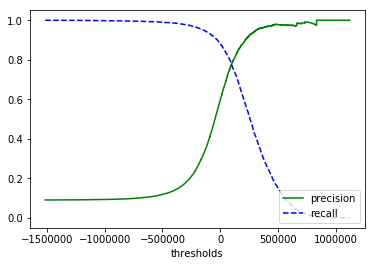

In [73]:
def precision_recall_threshold_curve(precision,recall,thresholds):
    plt.plot(thresholds,precision[:-1],'g-',label='precision')
    plt.plot(thresholds,recall[:-1],'b--',label='recall')
    plt.xlabel('thresholds')
    plt.legend(loc="lower right")
    plt.show()

precision_recall_threshold_curve(precision,recall,thresholds)

#  precision recall

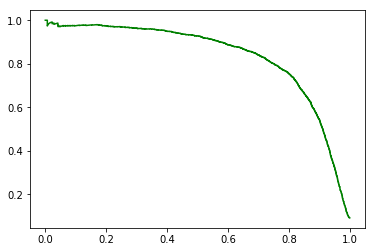

In [71]:
plt.plot(recall[:-1],precision[:-1],'g-',label='precision')
plt.show()

#### If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

# The ROC Curve
### ROC curve plots the true positive rate (another name for recall) against the false positive rate.

In [75]:
from sklearn.metrics import roc_curve 
fpr,tpr,thresholds=  roc_curve(y_train_5,y_scores)

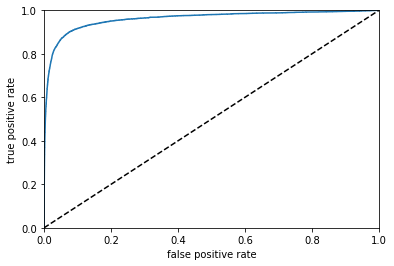

In [81]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

- Tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces.
- The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)
- One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5

## ROC AUC(Area Under Curve)

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.96124595235210553

prefer the PR curve whenever the positive class is rare or 
when you care more about the false positives than the false negatives, 
and the ROC curve otherwise

# RandomForest Classiffier

In [83]:
from sklearn.ensemble import RandomForestClassifier
for_clf=RandomForestClassifier(random_state=42)
y_prob_forest=cross_val_predict(for_clf,X_train,y_train_5,cv=3,method="predict_proba")
y_prob_forest

array([[ 0.8,  0.2],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ]])

In [86]:
y_score_forest=y_prob_forest[:,1]
y_score_forest

array([ 0.2,  0. ,  0. , ...,  0. ,  0. ,  0. ])

In [87]:
fpr_forest,tpr_forest,thresholds=  roc_curve(y_train_5,y_score_forest)

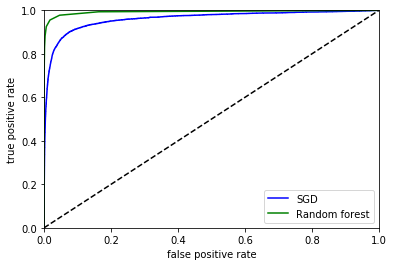

In [92]:
plt.plot(fpr,tpr,'b-', label="SGD")
plt.plot(fpr_forest,tpr_forest,'g-', label="Random forest")
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc='lower right')
plt.show()

In [93]:
roc_auc_score(y_train_5,y_score_forest)

0.99303410017547433